In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import solve_ivp
import scipy.interpolate as interpolate
from glob import glob
from tools import unique_maxs, local_max, generate_Rv_Plots
from datetime import datetime as dt
import pytz # for seting datetime timezone

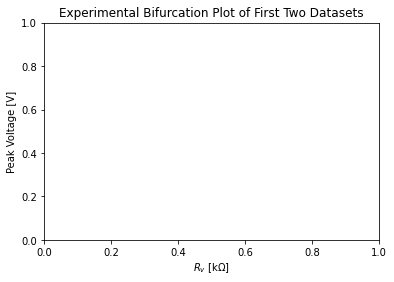

In [8]:
filenames = glob("/work/Data_experimental/Fast_sweep/*")
bifurcation = []
Rv_arr = []
data = {}
N = 50
#fig = plt.figure(figsize = (16,8))
for filename in filenames:
    
    t, negative_x_prime, x = np.genfromtxt(filename, skip_header = 12, delimiter = ',', unpack = True)
    t = t - np.min(t)
    x_prime = -negative_x_prime

    Rv = float(filename.split('/')[-1][3:-4])
    if Rv == 70.25:
        N = 1000
        
    Rv_arr.append(Rv)
    data[filename.split('/')[-1][:-4]] = (t,x)
    maxs = unique_maxs(x, N = N, error_tol = 1e-2)
    bifurcation.append(maxs)

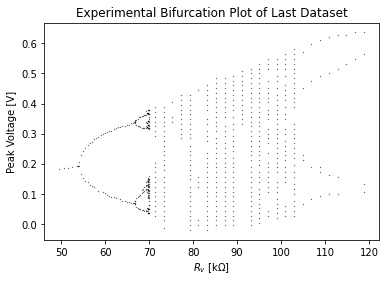

In [17]:
for Rv, bif in zip(Rv_arr, bifurcation):
    plt.plot(Rv*np.ones(len(bif))*0.99, bif, 'k.', markersize = 0.5)


tz = pytz.timezone('US/Pacific')
dateString = str(dt.now(tz).date())
plt.xlabel(r"$R_v$ [k$\Omega$]")
plt.ylabel(r"Peak Voltage [V]")
plt.title("Experimental Bifurcation Plot of Last Dataset")
# plt.xlim(65,71)
# plt.ylim(0,0.42)
plt.savefig("/work/Notes/Experimental/"+dateString+"-FastExperiBifurcation_v3.png",dpi = 600)
plt.show()

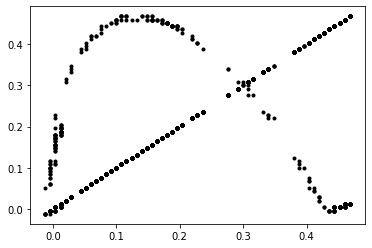

In [48]:
filename = "/work/Data_experimental/Fast_sweep/Rv_84.txt"
t, negative_x_prime, x = np.genfromtxt(filename, skip_header = 12, delimiter = ',', unpack = True)
peaks,_ = local_max(x,N=60)
x_n_array = peaks[:-1]
x_nplus_array = peaks[1:]

plt.plot(x_n_array,x_nplus_array,"k.");

In [3]:
# Try to find bifurcations by countim # periods
uniqueMaxArray = bifurcation
RvArray = np.array(Rv_arr_forLater)
#combinedBifurcationArray = np.column_stack((RvArray,uniqueMaxArray))
sortedIndexes = np.argsort(RvArray,axis = 0)

def find_experimental_splitting(unique_max_array,sortedIndexes):
    '''takes the result of finding unique maxs at each Rv and finds bifurcation spliting indeces'''
    indexes = []
    numPeriods = []
    split_value = 2
    for index in sortedIndexes:
        sub_array = unique_max_array[index]
        split = True

        if len(sub_array) >= split_value:
            indexes.append(index)
            split_value *= 2
            numPeriods.append(len(sub_array))
        else:
            split = False

    #print(indexes)
    return np.array(indexes),np.array(numPeriods)

idx,periods = find_experimental_splitting(uniqueMaxArray,sortedIndexes)
Rv_bif = RvArray[idx]
#print(idx)
#print(periods)
#print(Rv_bif)
for Rv in Rv_bif:
    plt.axvline(Rv,linewidth = 1, color = "Orange")
plt.plot(np.array(RvArray),np.array(peakNumber_Array),'k.',alpha = 0.3)
plt.plot(Rv_bif,periods,"k.")
plt.axhline(2,linewidth = 0.1)
plt.axhline(4,linewidth = 0.1)
plt.axhline(8,linewidth = 0.1)
plt.axhline(16,linewidth = 0.1)

faigenbaum_experimental = []
delta_Rvs = np.diff(Rv_bif)
for _ in range(len(delta_Rvs)-1):
    num = delta_Rvs[_]
    denom = delta_Rvs[_+1]
    faigenbaum_experimental.append(num/denom)
plt.xlim(np.min(Rv_bif)-1,np.max(Rv_bif)+1)
plt.yscale("Log")

print(faigenbaum_experimental)

NameError: name 'Rv_arr_forLater' is not defined

['/work/Data_experimental/Coarse_sweep1/Rv_54.6.txt', '/work/Data_experimental/Coarse_sweep1/Rv_54.5.txt', '/work/Data_experimental/Coarse_sweep1/Rv_54.7.txt', '/work/Data_experimental/Coarse_sweep1/Rv_55.txt', '/work/Data_experimental/Coarse_sweep1/Rv_55.5.txt', '/work/Data_experimental/Coarse_sweep1/Rv_60.txt']
[4.19745047e-02 5.44992575e+01]
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in sqrt


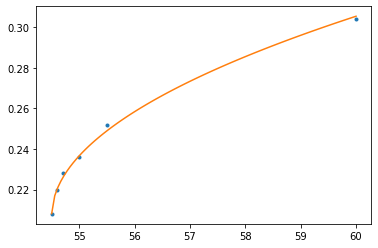

In [ ]:
filenames2 = [ "/work/Data_experimental/Coarse_sweep1/Rv_54.6.txt", "/work/Data_experimental/Coarse_sweep1/Rv_54.5.txt", 
                "/work/Data_experimental/Coarse_sweep1/Rv_54.7.txt","/work/Data_experimental/Coarse_sweep1/Rv_55.txt"
                ,"/work/Data_experimental/Coarse_sweep1/Rv_55.5.txt","/work/Data_experimental/Coarse_sweep1/Rv_60.txt"]
print(filenames2)hm ok my
data = []

Rv_arr = []
for filename in filenames2:
    t, negative_x_prime, x = np.genfromtxt(filename, skip_header = 12, delimiter = ',', unpack = True)
    t = t - np.min(t)
    x_prime = -negative_x_prime

    Rv = float(filename.split('/')[-1][3:-4])
    Rv_arr.append(Rv)
    
    
    maxs = max(unique_maxs(x, N = 500))
    data.append(maxs)
    

Rv_arr = np.array(Rv_arr) # like here?

def sqrt_func(Rv, a, b):
    return a*(Rv - b)**(1/2) + 0.207



plt.plot(Rv_arr, data, '.')

pOpt, pCov = curve_fit(sqrt_func, Rv_arr, data, p0 = [0.005, 54])
print(pOpt)

dx = np.linspace(min(Rv_arr), max(Rv_arr), 100)
plt.plot(dx, sqrt_func(dx, *pOpt))

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: Support for case-insensitive scales is deprecated since 3.5 and support will be removed two minor releases later.
[4.046153846153846, 6.5, 0.05555555555555555]


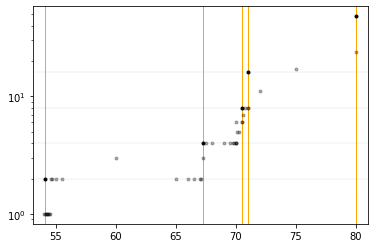

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4939151a-2261-4374-8b6d-a725368f8dc5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>